<a href="https://colab.research.google.com/github/walkerjian/DailyCode/blob/main/__Code_craft_max_gain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Problem:
Given a binary tree of integers, find the maximum path sum between two nodes. The path must go through at least one node, and does not need to go through the root.

##Solution:
To find the maximum path sum between two nodes in a binary tree, we need an approach that considers each node and the potential maximum sum path that includes it. This problem can be effectively solved with a recursive depth-first search (DFS) algorithm.

The idea is to compute the maximum path sum that goes through each node. For each node, there are four possibilities:

1. The maximum sum path goes through the left child only.
2. The maximum sum path goes through the right child only.
3. The maximum sum path goes through the node itself and possibly through both children.
4. The node itself is the maximum sum path (if the node's value is greater than the sum obtained through its children).

We need to consider each node as a potential highest-sum 'bridge' between its left and right subtrees. The key to the solution is a helper function that computes the maximum sum of a path ending at a given node, and in doing so, updates a global maximum sum variable whenever a higher sum is found.

In this code, `max_gain` is a recursive function that traverses the tree and calculates the maximum gain from each node to any of its descendants. The `max_sum` variable is updated whenever a path with a higher sum is found. The function returns the global maximum path sum.

##Implementation:

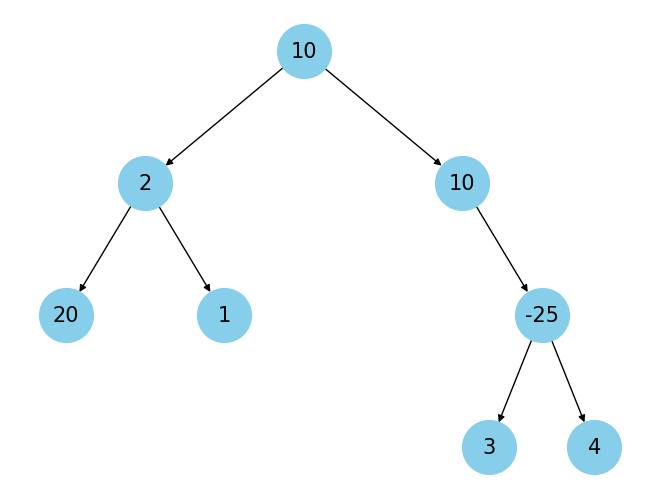

Test Case 1: Max Path: [20, 2, 10, 10, -25, 4], Max Sum: 42


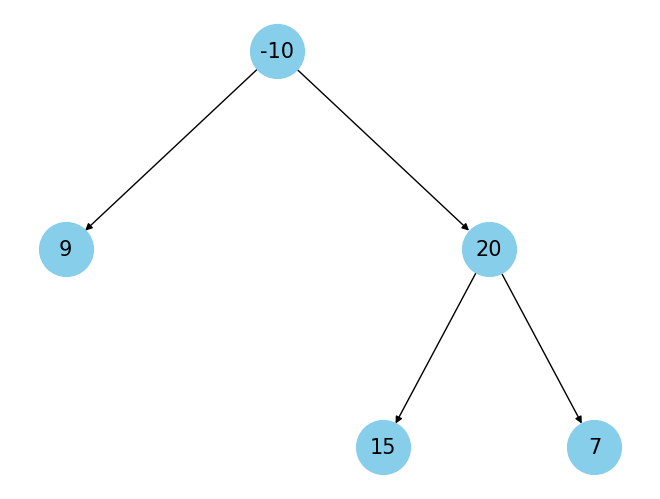

Test Case 2: Max Path: [15, 20, 7], Max Sum: 42


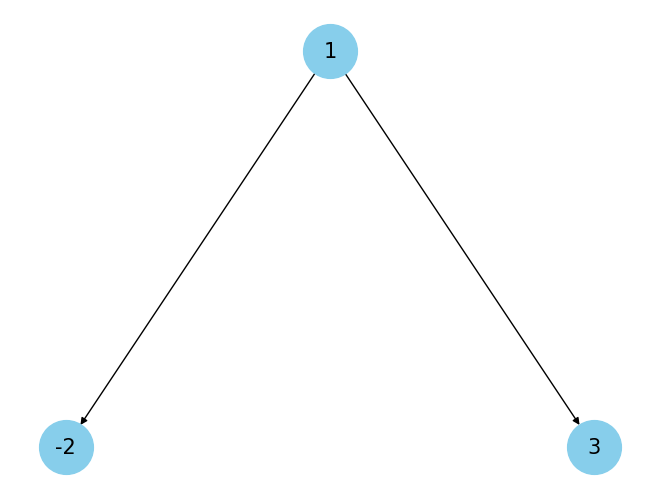

Test Case 3: Max Path: [1, 3], Max Sum: 4


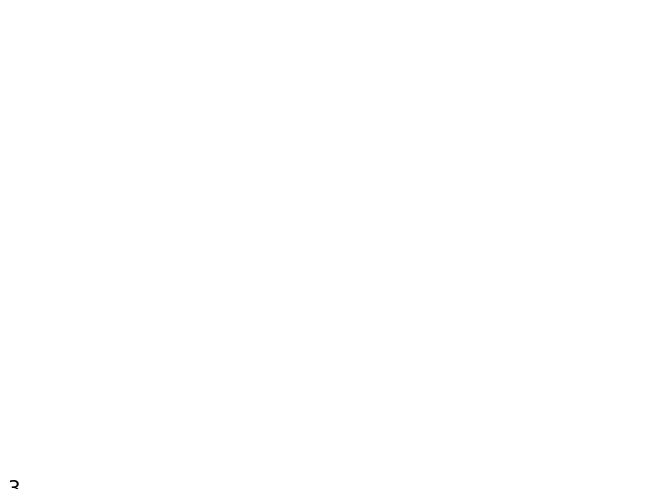

Test Case 4: Max Path: [-3], Max Sum: -3


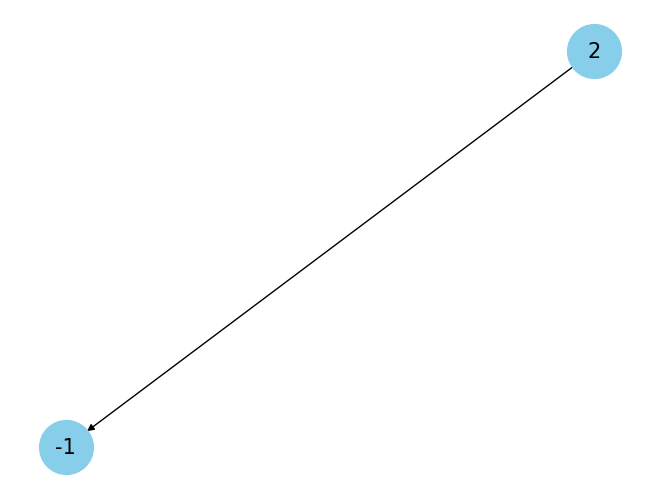

Test Case 5: Max Path: [2], Max Sum: 2


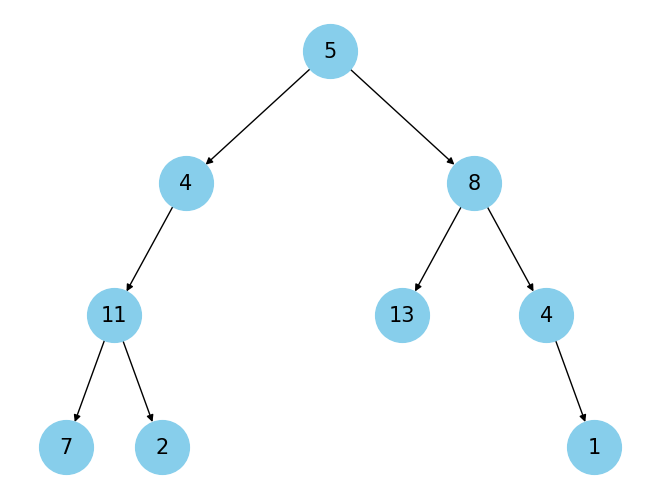

Test Case 6: Max Path: [7, 11, 4, 5, 13, 8], Max Sum: 48


In [12]:
import networkx as nx
import matplotlib.pyplot as plt

class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def maxPathSum(root):
    """
    Calculate the maximum path sum in a binary tree.
    The path may start and end at any node in the tree.
    """
    def max_gain(node):
        nonlocal max_sum, max_path
        if not node:
            return 0

        left_gain = max(max_gain(node.left), 0)
        right_gain = max(max_gain(node.right), 0)

        current_max = node.val + left_gain + right_gain
        if current_max > max_sum:
            max_sum = current_max
            max_path = [node.val]
            if left_gain > 0: max_path = get_path(node.left) + max_path
            if right_gain > 0: max_path += get_path(node.right)

        return node.val + max(left_gain, right_gain)

    def get_path(node):
        """ Get the path from the node to a leaf that forms the max sum. """
        if not node:
            return []
        left_gain = max(max_gain(node.left), 0)
        right_gain = max(max_gain(node.right), 0)
        return get_path(node.left) + [node.val] if left_gain > right_gain else [node.val] + get_path(node.right)

    max_sum = float('-inf')
    max_path = []
    max_gain(root)
    return max_path, max_sum

def display_tree(root):
    """ Display the binary tree with the root at the top. """

    def add_nodes_edges(node, G, pos=None, x=0, y=0, layer=1):
        if pos is None:
            pos = {}
        # Use the id() function to get a unique identifier for each node
        pos[id(node)] = (x, y)
        labels[id(node)] = node.val
        if node.left:
            pos = add_nodes_edges(node.left, G, pos, x - 1 / layer, y - 1, layer + 1)
            G.add_edge(id(node), id(node.left))
        if node.right:
            pos = add_nodes_edges(node.right, G, pos, x + 1 / layer, y - 1, layer + 1)
            G.add_edge(id(node), id(node.right))
        return pos

    if not root:
        return

    G = nx.DiGraph()
    labels = {}  # Dictionary to map node IDs to their values for labeling
    pos = add_nodes_edges(root, G)
    nx.draw(G, pos, labels=labels, with_labels=True, node_color='skyblue', node_size=1500, edge_color='black', linewidths=1, font_size=15)
    plt.show()

# Define test cases
test_cases = [
    TreeNode(10, TreeNode(2, TreeNode(20), TreeNode(1)), TreeNode(10, None, TreeNode(-25, TreeNode(3), TreeNode(4)))),
    TreeNode(-10, TreeNode(9), TreeNode(20, TreeNode(15), TreeNode(7))),
    TreeNode(1, TreeNode(-2), TreeNode(3)),
    TreeNode(-3),
    TreeNode(2, TreeNode(-1)),
    TreeNode(5, TreeNode(4, TreeNode(11, TreeNode(7), TreeNode(2)), None), TreeNode(8, TreeNode(13), TreeNode(4, None, TreeNode(1))))
]

# Run test cases
for i, root in enumerate(test_cases, 1):
    display_tree(root)
    path, max_sum = maxPathSum(root)
    print(f"Test Case {i}: Max Path: {path}, Max Sum: {max_sum}")
